<a href="https://colab.research.google.com/github/antonvandike/Algoritmos-Geneticos/blob/main/Libro_Eyal_Wirsansky/Handson_chapter_6_1_eggholder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solucion del problema de la funcion continua Eggholder

###Configuraciones y definiciones

In [1]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00


#Solucion del problema del agente de ventas viajero

###Configuraciones y definiciones

In [2]:
pip install deap

In [3]:
## Paso 1: Modulos

from deap import base
from deap import creator
from deap import tools

import random as rd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import elitism

In [4]:
# Constantes del problema:

DIMENSIONS = 2  # number of dimensions
BOUND_LOW, BOUND_UP = -512.0, 512.0  # boundaries for all dimensions

In [5]:
## Paso 2: Parametros del problema

# Contenido del problema del agente viajero

POPULATION_SIZE = 300     # Tamaño de la poblacion de individuos
P_CROSSOVER     =  0.9    # Probabilidad de cruza
P_MUTATION      =  0.5    # Probabilidad de mutación

MAX_GENERATIONS = 300     # Maximo numero de generaciones (condición de termino)

In [6]:
HALL_OF_FAME_SIZE = 30

In [7]:
CROWDING_FACTOR = 20.0  # Factor de aglomeracion para cruza y mutacion

In [8]:
## Paso 3: Elementos aleatorios

RANDOM_SEED = 42          # Comunmente cuando se experimenta con un codigo
rd.seed(RANDOM_SEED)      # se corre el problema con los mismos parametros
                          # para repetir y compara resultados

In [9]:
## Paso 4: Declarando el cromosoma
toolbox = base.Toolbox()

def randomFloat(low, up):
    return [rd.uniform(l, u) for l, u in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

toolbox.register("attrFloat", randomFloat, BOUND_LOW, BOUND_UP)

In [10]:
toolbox.attrFloat()

[142.77304162087296, -486.38898665198906]

In [11]:
## Paso 5: Crear la funcion de aptitud (FITNESS)

# Se indica maximizacion y un solo peso
creator.create('FitnessMin', base.Fitness, weights = (-1.0,))

In [12]:
## Paso 6: Crear la funcion de  aptitud del individuo

creator.create("Individual", list, fitness=creator.FitnessMin)

In [13]:
## Paso 7: Declarar el operador para generador de individuos

toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attrFloat)

In [14]:
## Paso 8: Declarar el operador para generar la poblacion

toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [15]:
## Paso 9: Definir función para calcular la aptitud
def eggholder(individual):
    x = individual[0]
    y = individual[1]
    f = (-(y + 47.0) * np.sin(np.sqrt(abs(x/2.0 + (y + 47.0)))) - x * np.sin(np.sqrt(abs(x - (y + 47.0)))))
    return f,  # return a tuple

In [16]:
## Paso 10: Declarar el operador de evaluacion

toolbox.register("evaluate", eggholder)

In [17]:
## Paso 11: Declarar los operadores geneticos

toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)

###Evolucionando la solución

In [18]:
def eggholder_problem():


    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with elitism:
    population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print info for best solution found:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])

    # extract statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    plt.show()



gen	nevals	min     	avg    
0  	300   	-938.344	5.30597
1  	258   	-938.344	-132.101
2  	258   	-938.344	-212.165
3  	259   	-938.344	-215.804
4  	257   	-938.344	-289.894
5  	263   	-938.344	-292.851
6  	253   	-938.344	-326.09 
7  	258   	-938.344	-358.532
8  	260   	-938.344	-406.511
9  	263   	-950.559	-456.314
10 	248   	-950.559	-496.04 
11 	257   	-950.559	-468.975
12 	257   	-950.559	-498.863
13 	256   	-950.559	-476.765
14 	262   	-950.559	-531.446
15 	262   	-950.559	-530.217
16 	259   	-954.329	-559.248
17 	262   	-954.329	-555.611
18 	262   	-958.508	-545.504
19 	258   	-958.802	-565.931
20 	255   	-959.094	-583.931
21 	257   	-959.094	-602.44 
22 	257   	-959.094	-586.79 
23 	256   	-959.094	-612.242
24 	257   	-959.105	-614.1  
25 	262   	-959.607	-641.177
26 	249   	-959.623	-656.35 
27 	256   	-959.623	-689.953
28 	260   	-959.634	-778.067
29 	252   	-959.634	-751.571
30 	249   	-959.634	-759.938
31 	256   	-959.636	-747.385
32 	252   	-959.639	-720.81 
33 	253   	-959.

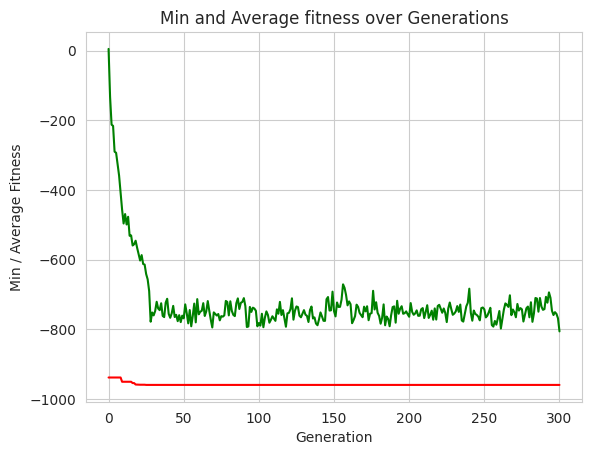

In [19]:
eggholder_problem()